## Forecating gross profit with monte carlo simulation

In [2]:
import datascience
import numpy as np
import matplotlib.pyplot as plt

In [3]:
rev_m = 170
rev_std = 20
iterations = 1000

In [4]:
0.6*170

102.0

In [5]:
rev = np.random.normal(rev_m,rev_std,iterations)

In [6]:
plt.figure(figsize=(15,6))
plt.plot(rev)
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
COGS = - (rev * np.random.normal(0.6,0.1))
plt.figure(figsize=(15,6))
plt.plot(COGS)
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


In [8]:
gross_profit = rev + COGS
gross_profit

plt.figure(figsize=(15,3))
plt.plot(gross_profit)
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


In [9]:
max(gross_profit)

91.91059950992056

In [10]:
min(gross_profit)

41.7329009038311

In [11]:
np.mean(gross_profit)

66.96402598642564

In [12]:
np.std(gross_profit)

7.945403791673349

In [13]:
plt.figure(figsize=(10,3))
plt.hist(gross_profit, bins = np.arange(40,130,10))
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
plt.figure(figsize=(10,3))
plt.hist(gross_profit, bins = 20)
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


## Forecasting stock prices with monte carlo simulation

### Price today = Price yesterday x e**r

#### Brownian motion is a model that allows us to predict the randomness in r
 - there is two component to it 
 1) Drift : the direction rate of return has been heading in the past. Drift = ( average daily return - 0.5*variance) --> expected return of a stock in the future 
 2) Volatility: random variable = standard deviation * Z[Rand(0;1)
 
 r = ( u - 0.5*var ) + var*Z[rand(0;1)]

In [15]:
#! pip install pandas-datareader

In [16]:
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm
%matplotlib inline

In [17]:
ticker = 'BBD-B.TO'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source = 'yahoo', start = '2007-1-1')['Adj Close']


In [18]:
log_returns = np.log(1 + data.pct_change())

In [19]:
log_returns.tail()

,BBD-B.TO
Date,
2019-10-24,-0.030962
2019-10-25,0.012500
2019-10-28,-0.012500
2019-10-29,-0.012658
2019-10-30,0.012658


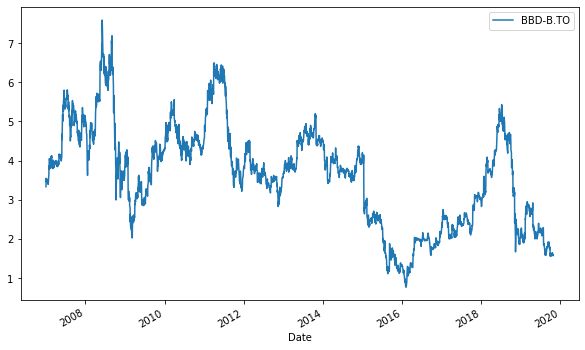

In [20]:
data.plot(figsize = (10,6))

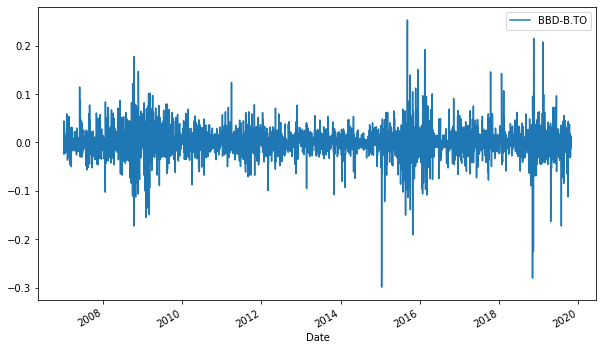

In [21]:
log_returns.plot(figsize = (10,6))

In [22]:
u = log_returns.mean()
u

BBD-B.TO   -0.00023
dtype: float64

In [23]:
var = log_returns.var()
var

BBD-B.TO    0.001041
dtype: float64

In [24]:
drift = u - (0.5*var) #expected daily return of the stock where 0.5*var is the random adjustment 
drift

BBD-B.TO   -0.000751
dtype: float64

In [25]:
stdev = log_returns.std()
stdev

BBD-B.TO    0.032271
dtype: float64

In [26]:
type(drift)

pandas.core.series.Series

In [27]:
type(stdev)

pandas.core.series.Series

In [28]:
np.array(drift)# converting the panda dataseries to array. Could've use drift.values instead

array([-0.00075075])

In [29]:
np.array(stdev)

array([0.03227073])

In [30]:
norm.ppf(0.95)

1.6448536269514722

In [31]:
x = np.random.rand(10,2)
x

array([[0.37977902, 0.93263498],
       [0.41525906, 0.07547126],
       [0.56730575, 0.56602127],
       [0.84122804, 0.03330786],
       [0.8635797 , 0.4058709 ],
       [0.8329907 , 0.55217409],
       [0.05885148, 0.60508025],
       [0.53017078, 0.71192273],
       [0.65746212, 0.46328368],
       [0.39549249, 0.94141881]])

In [32]:
norm.ppf(x)# probability (area under the curve) of each random return generated above

array([[-0.3060612 ,  1.49570692],
       [-0.2140371 , -1.43621026],
       [ 0.16951892,  0.16625349],
       [ 0.99951779, -1.83425787],
       [ 1.09654439, -0.23817961],
       [ 0.96605111,  0.13115611],
       [-1.56448819,  0.26651903],
       [ 0.07569916,  0.55901051],
       [ 0.40554661, -0.09216449],
       [-0.26503178,  1.56679599]])

In [33]:
Z = norm.ppf(np.random.rand(10,2)) #calculate the Z of each prob above to include in the function. use prob generated by random function and convert them into distances from the mean as measured by the number of std
Z

array([[ 0.61778294,  0.53313799],
       [-1.49262279,  0.65030031],
       [-0.15432563, -1.16094718],
       [-0.37208339,  0.06696253],
       [ 1.21175464,  0.55647806],
       [ 0.31605642,  1.09177307],
       [-0.3874871 ,  0.26176493],
       [ 1.04998615,  0.08191597],
       [-1.080088  ,  0.4050109 ],
       [-0.72414537,  0.95760509]])

In [46]:
t_interval = 1000 # estimating the stock price for the upcoming 1000 days
iteration = 10 # compute 10 series of future stock price prediction

In [47]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_interval,iteration)))

In [48]:
daily_returns

array([[0.96398209, 0.96453049, 0.98543547, ..., 0.94735345, 1.02616168,
        0.99757265],
       [1.00996593, 0.94646056, 1.03211688, ..., 1.07338269, 0.98606564,
        0.97446335],
       [0.99453695, 0.95828438, 0.96039521, ..., 0.94600647, 0.96242056,
        1.08458514],
       ...,
       [1.01040907, 1.00342671, 1.02164871, ..., 0.9384855 , 1.00214726,
        1.0065416 ],
       [1.02127528, 0.97864482, 1.04594322, ..., 0.95621979, 0.98894997,
        1.01721461],
       [1.02213803, 0.99926654, 1.03894154, ..., 1.02537935, 1.00692862,
        0.95043852]])

In [49]:
S0  = data.iloc[-1]# get the last stock price of PG
S0

BBD-B.TO    1.59
Name: 2019-10-30 00:00:00, dtype: float64

In [50]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
price_list[0] = S0 # each array contains 10 itteration. price_list[0] is the 1/1000 of the 10 itteration.
#We set the first element of each itteration to S0
price_list

array([[1.59000003, 1.59000003, 1.59000003, ..., 1.59000003, 1.59000003,
        1.59000003],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [52]:
for t in range (1,t_interval):
    price_list[t] = price_list[t-1]*daily_returns[t]


In [53]:
price_list

array([[1.59000003, 1.59000003, 1.59000003, ..., 1.59000003, 1.59000003,
        1.59000003],
       [1.60584586, 1.50487232, 1.64106588, ..., 1.70667851, 1.5678444 ,
        1.54939676],
       [1.59707305, 1.44209564, 1.57607181, ..., 1.61452891, 1.50892568,
        1.6804527 ],
       ...,
       [0.87267405, 0.39254464, 1.45917808, ..., 0.50724957, 4.09912096,
        0.54106486],
       [0.89124043, 0.38416178, 1.52621742, ..., 0.48504208, 4.05382554,
        0.55037908],
       [0.91097074, 0.38388001, 1.58565068, ..., 0.49735213, 4.08191297,
        0.52310148]])

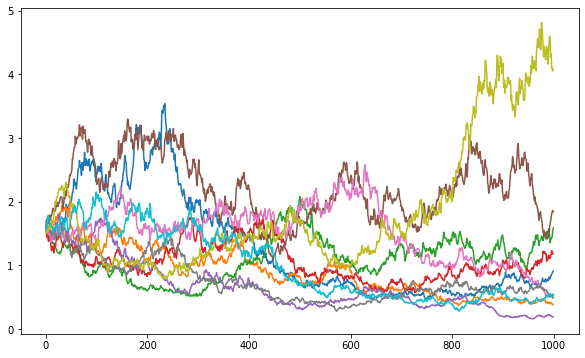

In [54]:
plt.figure(figsize = (10,6))
plt.plot(price_list)

In [55]:
price_list[1][2]

1.6410658760368002

In [56]:
buckets = []
for i in np.arange(0,1000):
    buckets.append(0)
buckets

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [59]:
for i in np.arange(0,1000,1):
    for j in np.arange(0,10,1):
        x = price_list[i][j]
        summation += x
    buckets[i] = summation/10
    summation = 0
        

buckets

NameError: name 'summation' is not defined

In [61]:
days = []
for i in np.arange(1,1001):
    days.append(i)
days

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [60]:
Table().with_columns('T',days).with_columns('Daily Prices', buckets).where('T',5)

NameError: name 'Table' is not defined